In [1]:
import pandas as pd
import numpy as np
ser1 = pd.Series(np.arange(4)*10)
ser1

0     0
1    10
2    20
3    30
dtype: int32

In [2]:
ser1[1:3]

1    10
2    20
dtype: int32

In [5]:
index = ['a','b','c','d']
ser2 = pd.Series(np.arange(4)*10,index)
ser2

a     0
b    10
c    20
d    30
dtype: int32

In [9]:
ser2['b':'d']    # 문자에서 슬라이싱, 문자형태나 내가 인덱스를 준 것은 끝점까지 포함되어 출력

b    10
c    20
d    30
dtype: int32

In [13]:
data= np.arange(16).reshape((4,4))
index = ['Ohio','Colorado','Utha','Newyork']
colums = ['one','two','three','four']
df1 = pd.DataFrame(data,index,colums)
df1

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utha,8,9,10,11
Newyork,12,13,14,15


In [15]:
df1['two']  #column 추출

Ohio         1
Colorado     5
Utha         9
Newyork     13
Name: two, dtype: int32

In [17]:
df1.four

Ohio         3
Colorado     7
Utha        11
Newyork     15
Name: four, dtype: int32

In [19]:
df1[['two','four']]          # 두 개의 열 추출

,two,four
Ohio,1,3
Colorado,5,7
Utha,9,11
Newyork,13,15


In [20]:
df1[:2]    # 0행부터 3행까지

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [21]:
df1[df1['three']>5]    # three가 5보다 큰 행만 살아남음

,one,two,three,four
Colorado,4,5,6,7
Utha,8,9,10,11
Newyork,12,13,14,15


In [22]:
df1.loc['Colorado',['two','three']]     # loc - 색인 이름으로 접근

two      5
three    6
Name: Colorado, dtype: int32

In [24]:
df1.iloc[1,[1,2]]    # iloc - 정수 색인으로 접근, 범위로 지정할 때 사용

two      5
three    6
Name: Colorado, dtype: int32

In [26]:
df1.loc[['Colorado','Utha'],['two','three']]

,two,three
Colorado,5,6
Utha,9,10


In [28]:
df1.iloc[[1,2],[1,2]]    # 위와 같음

,two,three
Colorado,5,6
Utha,9,10


In [29]:
s1 = pd.Series([7.3,-2.5,.4,1.5], index = ['a','c','d','e'])
s2 = pd.Series([-2.1,3.6,-1.5,4,3.1], index = ['a','c','e','f','g'])

In [30]:
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [31]:
# 크기가 다른 데이터프레임
df1 = pd.DataFrame(np.arange(12).reshape((3,4)), columns = ["a","b","c","d"])
df2 = pd.DataFrame(np.arange(20).reshape((4,5)), columns = ["a","b","c","d","e"])

In [36]:
# 더하기
df2.loc[1,'b']=np.nan
df2

,a,b,c,d,e
0,0,1.0,2,3,4
1,5,NaN,7,8,9
2,10,11.0,12,13,14
3,15,16.0,17,18,19


In [33]:
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [37]:
df1.add(df2, fill_value=0)            # NaN값이 사라짐

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [39]:
frame = pd.DataFrame(np.random.randn(4,3), 
                     columns = ["b","d","e"],
                     index = ["Utah","Ohio","Texas","Oregon"])
frame

,b,d,e
Utah,0.814496,0.811285,-1.162331
Ohio,-0.931811,-3.002761,-0.712275
Texas,-1.178718,-0.394631,1.446581
Oregon,-0.482831,-1.686076,-0.127624


In [40]:
np.abs(frame)  # universal 함수

,b,d,e
Utah,0.814496,0.811285,1.162331
Ohio,0.931811,3.002761,0.712275
Texas,1.178718,0.394631,1.446581
Oregon,0.482831,1.686076,0.127624


In [41]:
f = lambda x: x.max()-x.min()   # lambda 함수를 쓸 때는 apply를 쓴다
frame.apply(f)                  # 열에서 비교

b    1.993214
d    3.814046
e    2.608912
dtype: float64

In [42]:
frame.apply(lambda x: x.max()-x.min(),    # 같은 행에서 비교
           axis='columns')

Utah      1.976827
Ohio      2.290486
Texas     2.625299
Oregon    1.558452
dtype: float64

In [49]:
format = lambda x: '%.2f'%x
frame.applymap(format)

,b,d,e
Utah,0.81,0.81,-1.16
Ohio,-0.93,-3.00,-0.71
Texas,-1.18,-0.39,1.45
Oregon,-0.48,-1.69,-0.13


In [56]:
def f(x): 
    data = [x.min(),x.max()]
    index = ['min','max']
    return pd.Series(data,index)

frame.apply(f)


,b,d,e
min,-1.178718,-3.002761,-1.162331
max,0.814496,0.811285,1.446581


In [51]:
frame['e']

Utah     -1.162331
Ohio     -0.712275
Texas     1.446581
Oregon   -0.127624
Name: e, dtype: float64

In [52]:
frame['e'].map(format)    # 3D일때는 map으로 씀

Utah      -1.16
Ohio      -0.71
Texas      1.45
Oregon    -0.13
Name: e, dtype: object

In [58]:
s3 = pd.Series([0,1,2,3], index = ["d","a","b","c"])
s3.sort_index()  # index를 순서대로 정렬

a    1
b    2
c    3
d    0
dtype: int64

In [59]:
df3 = pd.DataFrame(np.arange(8).reshape((2,4)), index = ["three","one"],
                  columns = ["d","a","b","c"])
df3

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [60]:
df3.sort_index()   # df3.sort_index(axis=0)
# one과 three를 재정렬, o가 더 빠르니까 one이 앞으로 온다. one 자체랑은 무관

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [61]:
df3.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [74]:
# 가로 세로 둘 다 정렬 방법 1
df3.sort_index().sort_index(axis=1) 

,a,b,c,d
one,5,6,7,4
three,1,2,3,0


In [75]:
# 가로 세로 둘 다 정렬 방법 2
df4 = df3.sort_index()
df4.sort_index(axis=1)

,a,b,c,d
one,5,6,7,4
three,1,2,3,0


In [78]:
# 열을 역순으로 정렬
df3.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [79]:
# 값들이 증가하는 방향으로 정렬
s4 = pd.Series([4,7,-3,2])
s4.sort_values()
# NaN이 포함되어있으면 마지막으로 뺌

2   -3
3    2
0    4
1    7
dtype: int64

In [80]:
s5 = pd.Series([7,-5,7,4,2,0,4])
s5.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [81]:
s5 = pd.Series([7,-5,7,4,2,0,4])
s5.rank(ascending=False, method='max')  # 내림차순 정렬

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [83]:
# 중복색인
s6 = pd.Series(range(5), index=['kim','kim','lee','lee','park'])
s6

kim     0
kim     1
lee     2
lee     3
park    4
dtype: int64

In [85]:
s6.index.is_unique

False

In [86]:
# 중복되는 색인이 있을 때 다른 숫자 부여
s6['kim']

kim    0
kim    1
dtype: int64

In [88]:
s6['park']

4

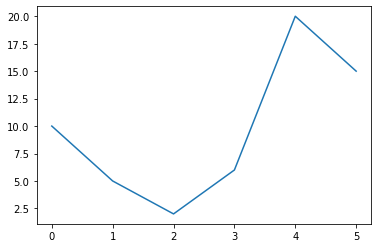

In [90]:
import matplotlib.pyplot as plt
data = [10,5, 2,6,20,15]
plt.plot(data)
plt.show()  # 그래프만 표시

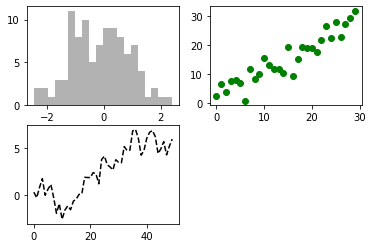

In [98]:
fig= plt.figure()
ax1 = fig.add_subplot(2,2,1)   # 가로 세로 2개씩 총 4개의 그룹을 그림으로 만드는 중 첫번째 그림
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)    # alpha=투명도
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30),color='g')
ax3 = fig.add_subplot(2,2,3)
ax3.plot(np.random.randn(50).cumsum(), 'k--')  # cumsum-앞에꺼를 참고해서 가파르지않게 잘 그리는 함수
# k =검정색, k-- : 점선으로 검정색

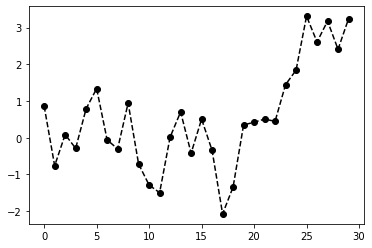

In [99]:
plt.plot(np.random.randn(30).cumsum(),'ko--')

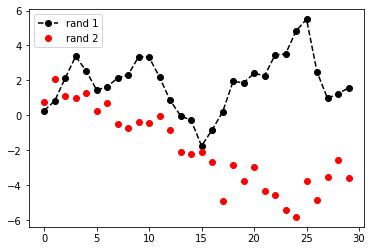

In [100]:
plt.plot(np.random.randn(30).cumsum(),'ko--', label ="rand 1")
plt.plot(np.random.randn(30).cumsum(),'ro', label ="rand 2")
plt.legend(loc='best')

In [130]:
np.random.randn(30).cumsum()

array([-0.3391695 ,  0.82659974,  0.18748863, -0.3238294 , -0.56961828,
       -0.66863599, -1.06713138, -0.83187687, -1.43185598, -1.25065986,
        0.20772747, -0.94006328, -0.88842122, -2.00506644, -2.08440674,
       -2.85067686, -3.13622966, -2.86854753, -3.23448421, -3.53971104,
       -4.51874689, -5.13260403, -5.01706897, -3.86692203, -4.22915155,
       -4.94296896, -4.75189774, -4.24369693, -5.54754756, -4.4212408 ])

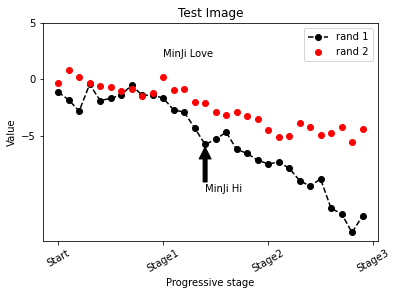

In [138]:
data1 = [ -1.13091875,  -1.8141486 ,  -2.81471751,  -0.43518435,
        -1.87746604,  -1.68493625,  -1.37048858,  -0.5204684 ,
        -1.40532092,  -1.39758337,  -1.65118129,  -2.70744139,
        -2.90404105,  -4.31244905,  -5.77216024,  -5.3340418 ,
        -4.6788128 ,  -6.20916091,  -6.57244126,  -7.17906586,
        -7.49537811,  -7.36329278,  -7.87014443,  -8.9822007 ,
        -9.48204171,  -8.83319521, -11.45486286, -11.93324351,
       -13.59558851, -12.1227167 ]
data2 = [-0.3391695 ,  0.82659974,  0.18748863, -0.3238294 , -0.56961828,
       -0.66863599, -1.06713138, -0.83187687, -1.43185598, -1.25065986,
        0.20772747, -0.94006328, -0.88842122, -2.00506644, -2.08440674,
       -2.85067686, -3.13622966, -2.86854753, -3.23448421, -3.53971104,
       -4.51874689, -5.13260403, -5.01706897, -3.86692203, -4.22915155,
       -4.94296896, -4.75189774, -4.24369693, -5.54754756, -4.4212408 ]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(data1,'ko--', label ="rand 1")
plt.plot(data2,'ro', label ="rand 2")
ax.legend(loc='best')
ax.set_xticks([0,10, 20,30]) # tick - 눈금
ax.set_xticklabels(["Start","Stage1","Stage2","Stage3"], rotation=30)
ax.set_xlabel("Progressive stage")
ax.set_yticks([-5,0,5]) 
ax.set_ylabel("Value")
ax.set_title("Test Image")
ax.text(10,2,"MinJi Love")
ax.annotate("MinJi Hi",xy=(14,-6), xytext=(14,-10), arrowprops=dict(facecolor="black"))
plt.show()

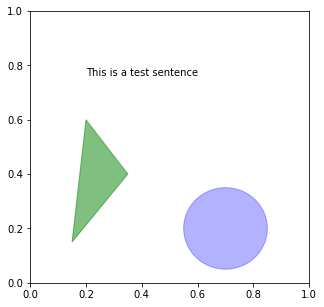

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))   # 원하는대로 그림 사이즈를 지정(정방형)
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((1.2,0.75),0.6,0.05, color='k', alpha=0.2)
cir = plt.Circle((0.7,0.2),0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]], color='g', alpha=0.5)
ax.text(0.2,0.76, "This is a test sentence")
ax.add_patch(rect)
ax.add_patch(cir)
ax.add_patch(pgon)

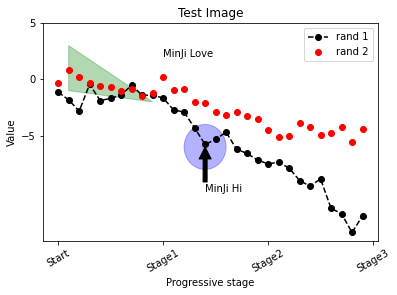

In [194]:
data1 = [ -1.13091875,  -1.8141486 ,  -2.81471751,  -0.43518435,
        -1.87746604,  -1.68493625,  -1.37048858,  -0.5204684 ,
        -1.40532092,  -1.39758337,  -1.65118129,  -2.70744139,
        -2.90404105,  -4.31244905,  -5.77216024,  -5.3340418 ,
        -4.6788128 ,  -6.20916091,  -6.57244126,  -7.17906586,
        -7.49537811,  -7.36329278,  -7.87014443,  -8.9822007 ,
        -9.48204171,  -8.83319521, -11.45486286, -11.93324351,
       -13.59558851, -12.1227167 ]
data2 = [-0.3391695 ,  0.82659974,  0.18748863, -0.3238294 , -0.56961828,
       -0.66863599, -1.06713138, -0.83187687, -1.43185598, -1.25065986,
        0.20772747, -0.94006328, -0.88842122, -2.00506644, -2.08440674,
       -2.85067686, -3.13622966, -2.86854753, -3.23448421, -3.53971104,
       -4.51874689, -5.13260403, -5.01706897, -3.86692203, -4.22915155,
       -4.94296896, -4.75189774, -4.24369693, -5.54754756, -4.4212408 ]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(data1,'ko--', label ="rand 1")
plt.plot(data2,'ro', label ="rand 2")
ax.legend(loc='best')
ax.set_xticks([0,10, 20,30]) # tick - 눈금
ax.set_xticklabels(["Start","Stage1","Stage2","Stage3"], rotation=30)
ax.set_xlabel("Progressive stage")
ax.set_yticks([-5,0,5]) 
ax.set_ylabel("Value")
ax.set_title("Test Image")
ax.text(10,2,"MinJi Love")
ax.annotate("MinJi Hi",xy=(14,-6), xytext=(14,-10), arrowprops=dict(facecolor="black"))
cir = plt.Circle((14,-6),2, color='b', alpha=0.3)
ax.add_patch(cir)
pgon = plt.Polygon([[1,-1],[1,3],[9,-2]], color='g', alpha=0.3)
ax.add_patch(pgon)
plt.show()